In [1]:
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
Minuit.print_level = 1      # This sets the level of printing when fitting with Minuit

In [2]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [3]:
def read_data(filename):
    root= '/Users/asgerthormann/Documents/applied_statistics/Project/Pendulum/pendulum_timing/'
    dat = np.genfromtxt(root+filename, delimiter='\t', names=('n', 't_s'))

    return dat

In [4]:
# measurement data


data_1_asger = read_data('asger_timing_1.dat')
data_2_asger = read_data('asger_timing_2.dat')
data_3_asger = read_data('asger_timing_3.dat')

data_1_ask = read_data('ask_timing_1.dat')
data_2_ask = read_data('ask_timing_2.dat')
#data_3_ask = read_data('ask_timing_3.dat')

data_1_jeppe = read_data('jeppe_timing_1.dat')
data_2_jeppe = read_data('jeppe_timing_2.dat')
data_3_jeppe = read_data('jeppe_timing_3.dat')

data_1_julie = read_data('julie_timing_1.dat')
data_2_julie = read_data('julie_timing_2.dat')
data_3_julie = read_data('julie_timing_3.dat')

data_1_sebastian = read_data('seb_timing_1.dat')
data_2_sebastian = read_data('seb_timing_2.dat')
data_3_sebastian = read_data('seb_timing_3.dat')


n_1_asger, t_1_asger = data_1_asger['n'], data_1_asger['t_s']
n_2_asger, t_2_asger = data_2_asger['n'], data_2_asger['t_s']
n_3_asger, t_3_asger = data_3_asger['n'], data_3_asger['t_s']

n_1_ask, t_1_ask = data_1_ask['n'], data_1_ask['t_s']
n_2_ask, t_2_ask = data_2_ask['n'], data_2_ask['t_s']
#n_3_ask, t_3_ask = data_3_ask['n'], data_3_ask['t_s']

n_1_jeppe, t_1_jeppe = data_1_jeppe['n'], data_1_jeppe['t_s']
n_2_jeppe, t_2_jeppe = data_2_jeppe['n'], data_2_jeppe['t_s']
n_3_jeppe, t_3_jeppe = data_3_jeppe['n'], data_3_jeppe['t_s']

n_1_julie, t_1_julie = data_1_julie['n'], data_1_julie['t_s']
n_2_julie, t_2_julie = data_2_julie['n'], data_2_julie['t_s']
n_3_julie, t_3_julie = data_3_julie['n'], data_3_julie['t_s']

n_1_sebastian, t_1_sebastian = data_1_sebastian['n'], data_1_sebastian['t_s']
n_2_sebastian, t_2_sebastian = data_2_sebastian['n'], data_2_sebastian['t_s']
n_3_sebastian, t_3_sebastian = data_3_sebastian['n'], data_3_sebastian['t_s']

data_sets = [
    (n_1_asger, t_1_asger),
    (n_2_asger, t_2_asger),
    (n_3_asger, t_3_asger),
    (n_1_ask, t_1_ask),
    (n_2_ask, t_2_ask),
    (n_1_jeppe, t_1_jeppe),
    (n_2_jeppe, t_2_jeppe),
    (n_3_jeppe, t_3_jeppe),
    (n_1_julie, t_1_julie),
    (n_2_julie, t_2_julie),
    (n_3_julie, t_3_julie),
    (n_1_sebastian, t_1_sebastian),
    (n_2_sebastian, t_2_sebastian),
    (n_3_sebastian, t_3_sebastian),
]

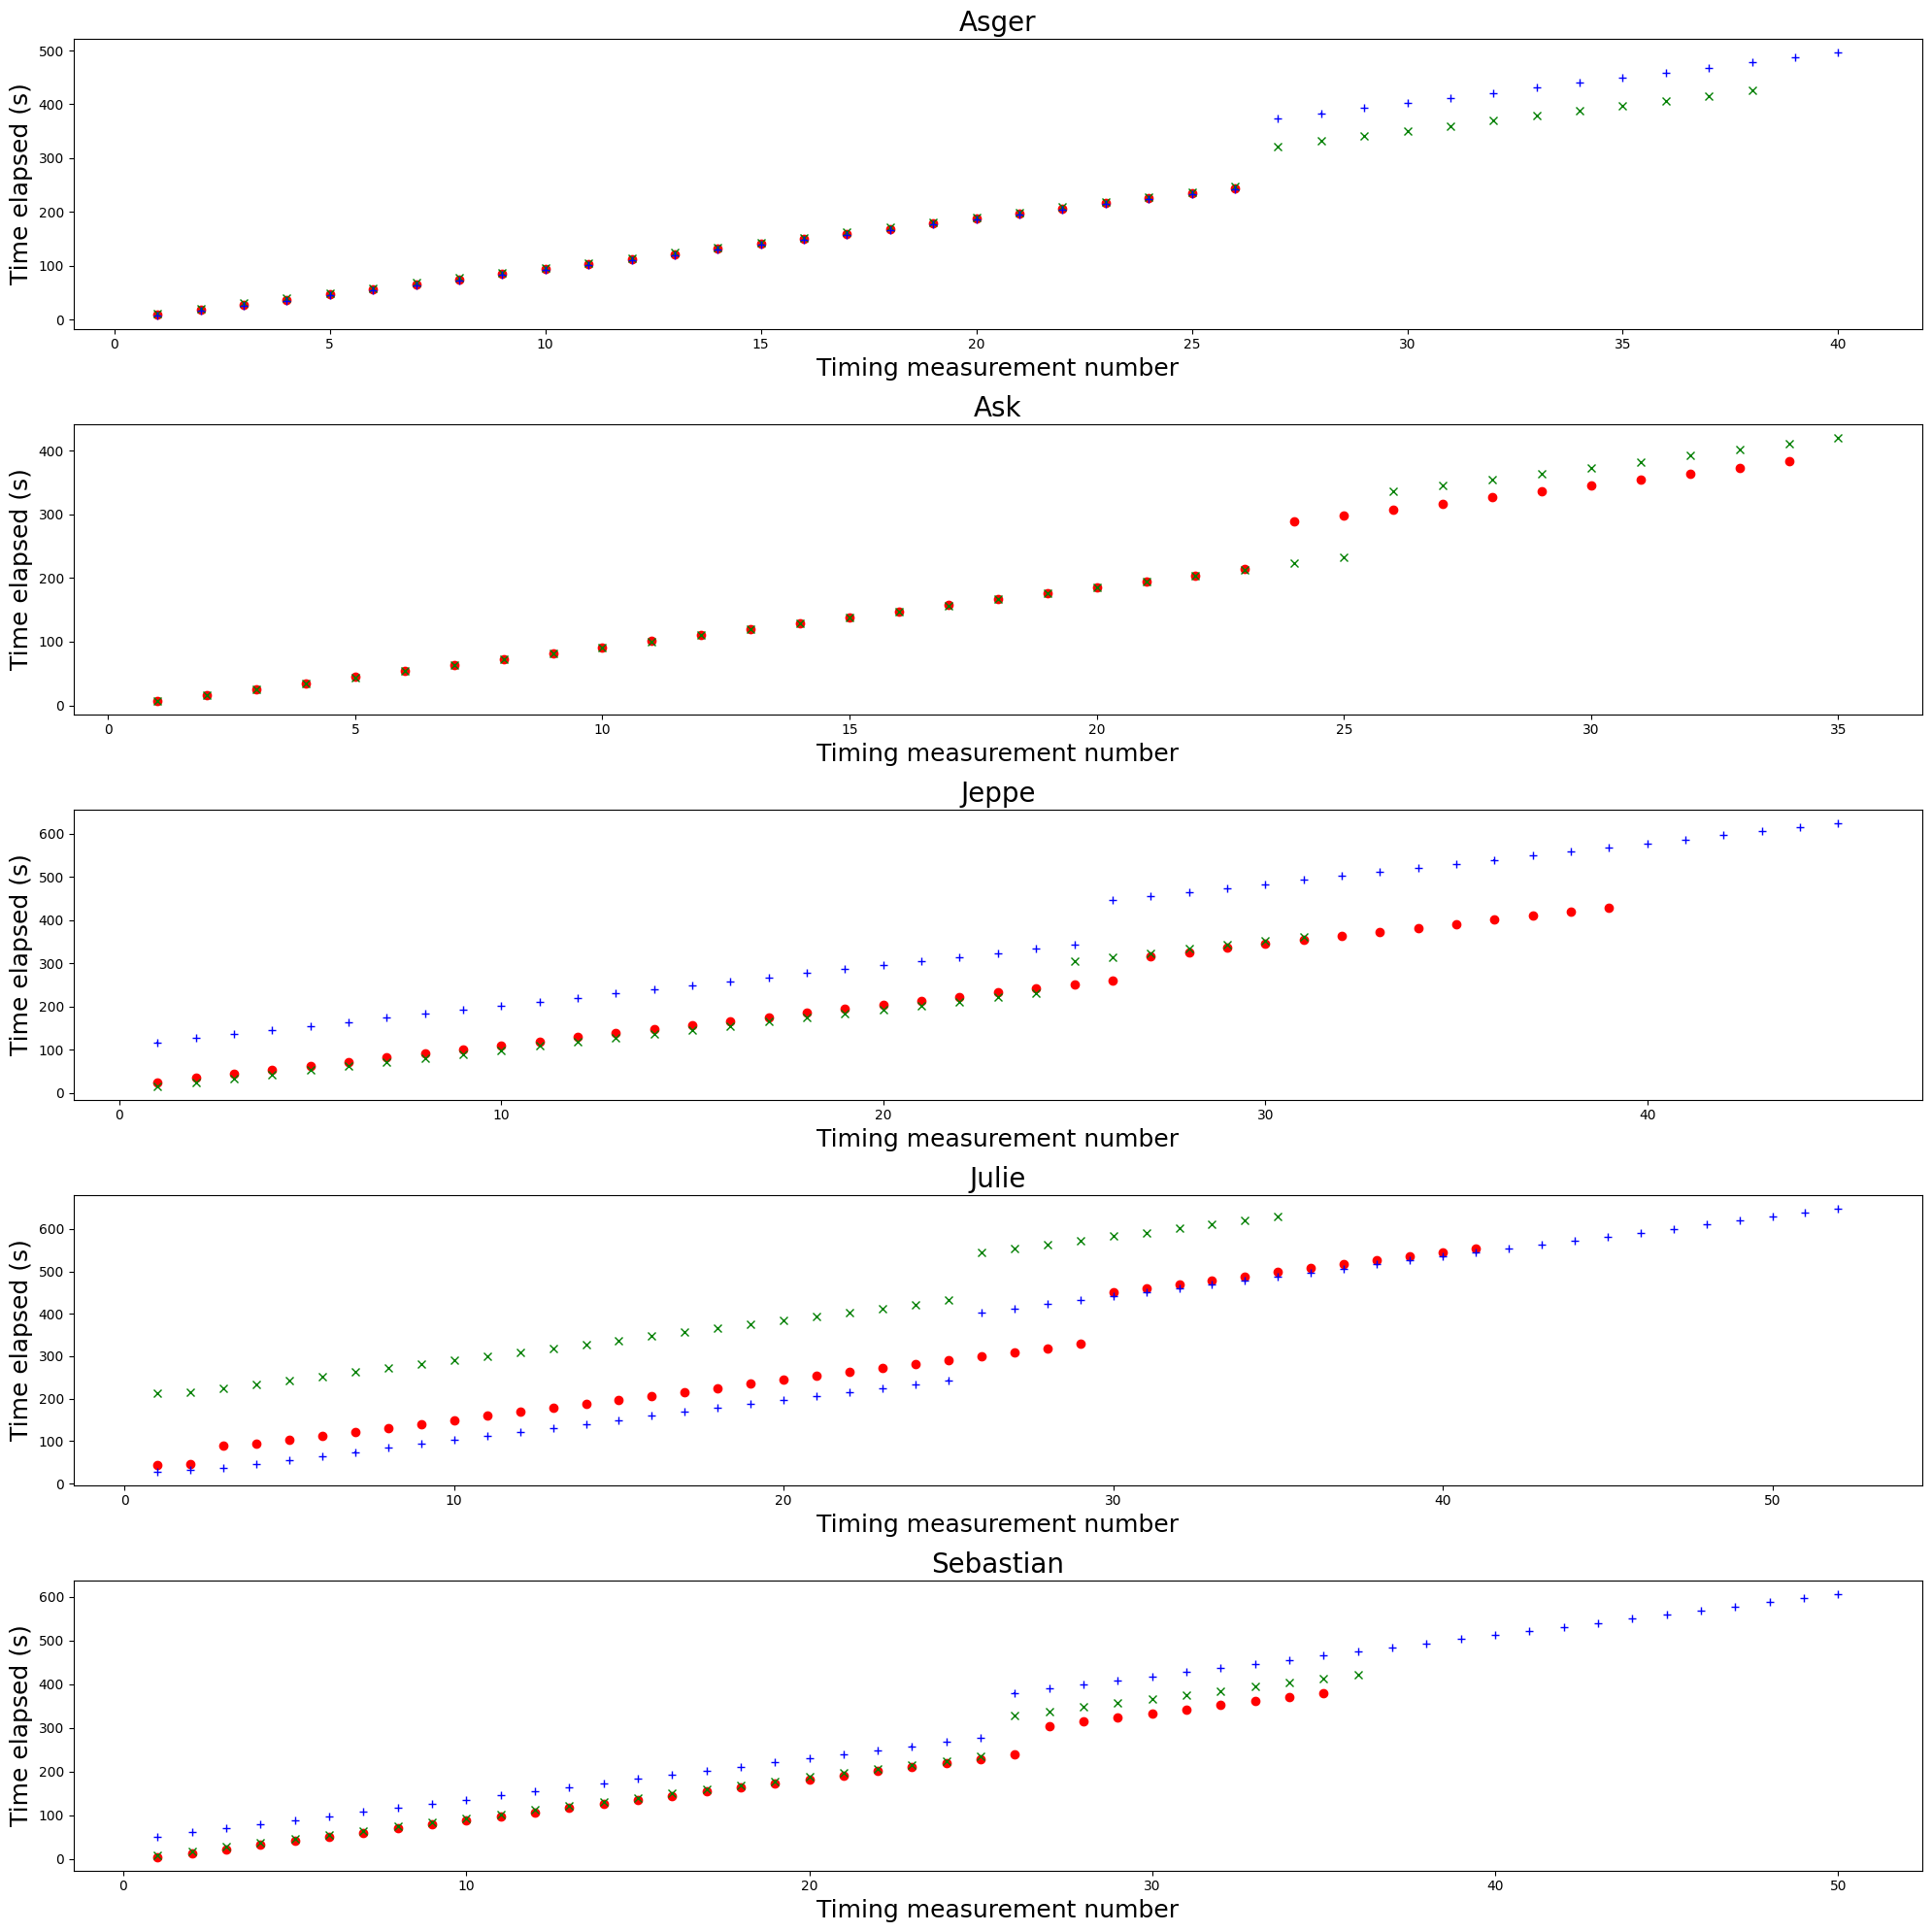

In [5]:
# Plotting
sig_t = 0.1     
fig, axs = plt.subplots(nrows=5,figsize=(20, 20))
axs[0].errorbar(n_1_asger, t_1_asger, yerr=sig_t, color='r', fmt='o')
axs[0].errorbar(n_2_asger, t_2_asger, yerr=sig_t, color='g', fmt='x')
axs[0].errorbar(n_3_asger, t_3_asger, yerr=sig_t, color='b', fmt='+')
axs[0].set_xlabel('Timing measurement number', fontsize=18)
axs[0].set_ylabel('Time elapsed (s)', fontsize=18)
axs[0].set_title('Asger', fontsize=20)


axs[1].errorbar(n_1_ask, t_1_ask, yerr=sig_t, color='r', fmt='o')
axs[1].errorbar(n_2_ask, t_2_ask, yerr=sig_t, color='g', fmt='x')
#axs[1].errorbar(n_3_ask, t_3_ask, yerr=sig_t, color='b', fmt='+')
axs[1].set_xlabel('Timing measurement number', fontsize=18)
axs[1].set_ylabel('Time elapsed (s)', fontsize=18)
axs[1].set_title('Ask', fontsize=20)


axs[2].errorbar(n_1_jeppe, t_1_jeppe, yerr=sig_t, color='r', fmt='o')
axs[2].errorbar(n_2_jeppe, t_2_jeppe, yerr=sig_t, color='g', fmt='x')
axs[2].errorbar(n_3_jeppe, t_3_jeppe, yerr=sig_t, color='b', fmt='+')
axs[2].set_xlabel('Timing measurement number', fontsize=18)
axs[2].set_ylabel('Time elapsed (s)', fontsize=18)
axs[2].set_title('Jeppe', fontsize=20)


axs[3].errorbar(n_1_julie, t_1_julie, yerr=sig_t, color='r', fmt='o')
axs[3].errorbar(n_2_julie, t_2_julie, yerr=sig_t, color='g', fmt='x')
axs[3].errorbar(n_3_julie, t_3_julie, yerr=sig_t, color='b', fmt='+')
axs[3].set_xlabel('Timing measurement number', fontsize=18)
axs[3].set_ylabel('Time elapsed (s)', fontsize=18)
axs[3].set_title('Julie', fontsize=20)


axs[4].errorbar(n_1_sebastian, t_1_sebastian, yerr=sig_t, color='r', fmt='o')
axs[4].errorbar(n_2_sebastian, t_2_sebastian, yerr=sig_t, color='g', fmt='x')
axs[4].errorbar(n_3_sebastian, t_3_sebastian, yerr=sig_t, color='b', fmt='+')
axs[4].set_xlabel('Timing measurement number', fontsize=18)
axs[4].set_ylabel('Time elapsed (s)', fontsize=18)
axs[4].set_title('Sebastian', fontsize=20)
plt.tight_layout()

In [6]:
def cut_data(n, t, max_n=26):
    mask = n <= max_n
    #n_rest, t_rest = n[~mask], t[~mask]
    return n[mask], t[mask] #n_rest, t_rest

def lin_fit(x, a,b):
    return a*x + b


def gauss_pdf(x,mu, sigma) :
    """Gaussian"""
    return 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def clean_data(data_array):
    
    criterion = 1.0 / (2 * len(data_array))  # Bonferroni correction
    mean = data_array.mean()

    local_std = data_array.std(ddof=1)
    if local_std == 0:
        return data_array

    # vectorized z-scores and p-values
    z_scores = np.abs(data_array - mean) / local_std
    p_values = 2 * (1 - stats.norm.cdf(z_scores))

    # boolean mask: True for kept elements
    keep_mask = p_values >= criterion

    # apply mask to the inputs (use local arrays, not the global L30cm)
    data_subset = data_array[keep_mask]

    return data_subset

In [7]:
i=0
param_list = []
#param_rest_list = []
for dat in data_sets:
    n, t = dat
    if i==3 or i ==4 or i==6 or i==7 or i==9 or i==10 or i==12 or i==13:
        n_cut, t_cut = cut_data(n, t, max_n=23)
    
    else:
        n_cut, t_cut = cut_data(n, t, max_n=26)
    
    if i==8:
        n,t =n[2:], t[2:]  # Julie 2 has an outlier at n=0
    
    chi2_lin =cost.LeastSquares(n_cut, t_cut, sig_t, lin_fit)
    m_lin = Minuit(chi2_lin, a=0.1, b=0.1)
    m_lin.migrad()  
    params = np.array(m_lin.values)
    param_list.append(params)

  
    i+=1

/Users/asgerthormann/Documents/applied_statistics/AppStat2025/.venv/lib/python3.13/site-packages/iminuit/cost.py:168: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.sort(np.log(x + _TINY_FLOAT)))


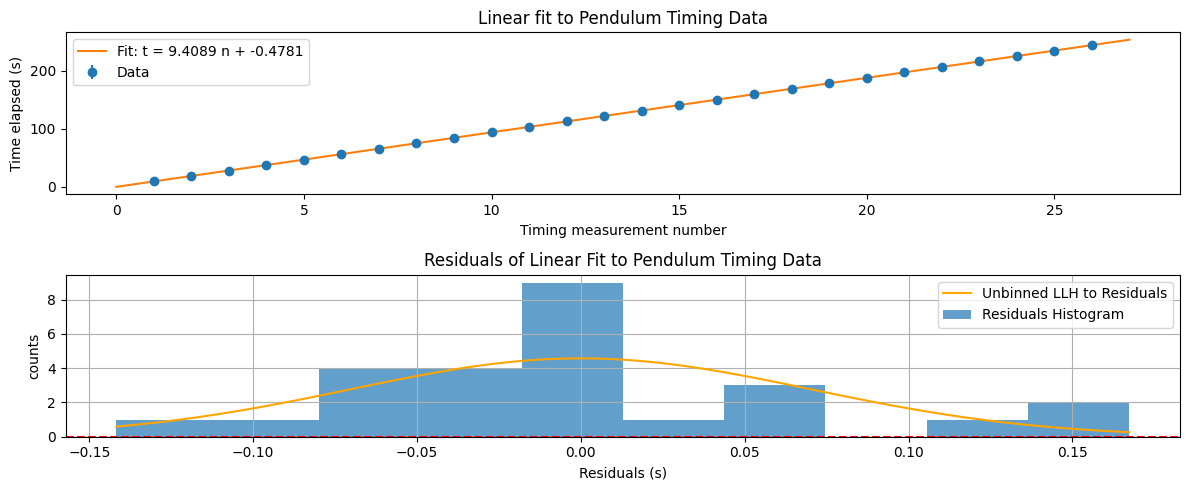

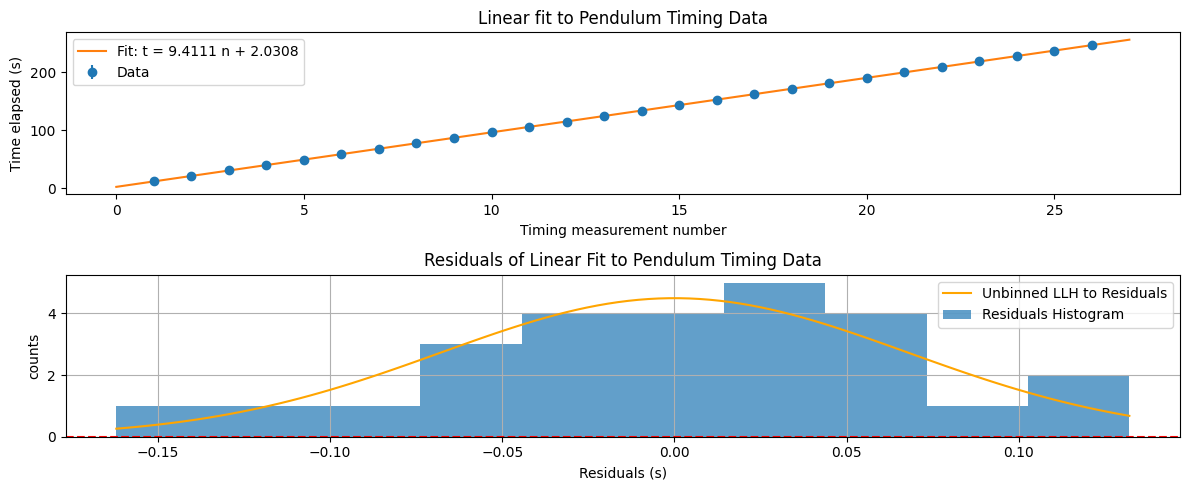

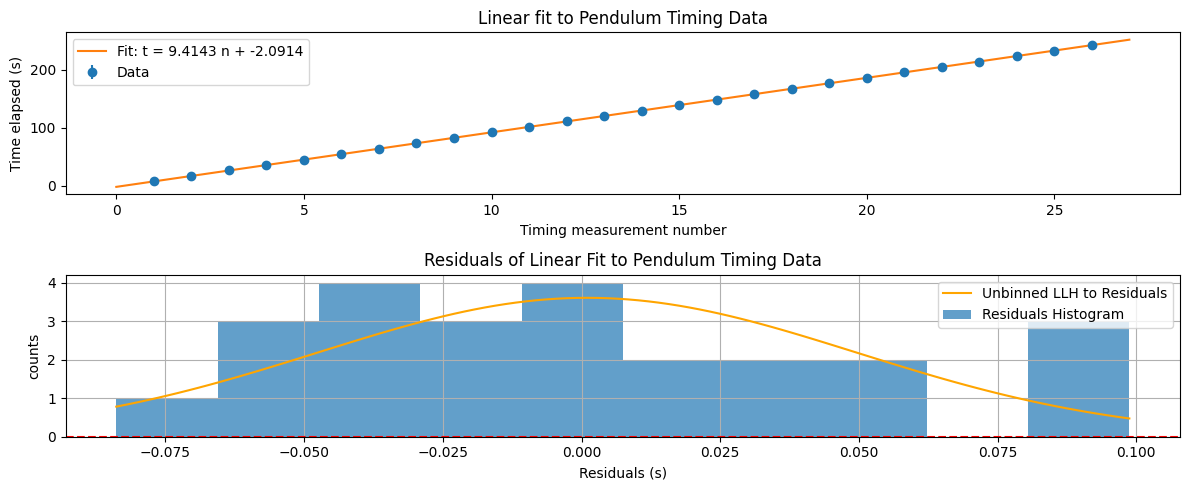

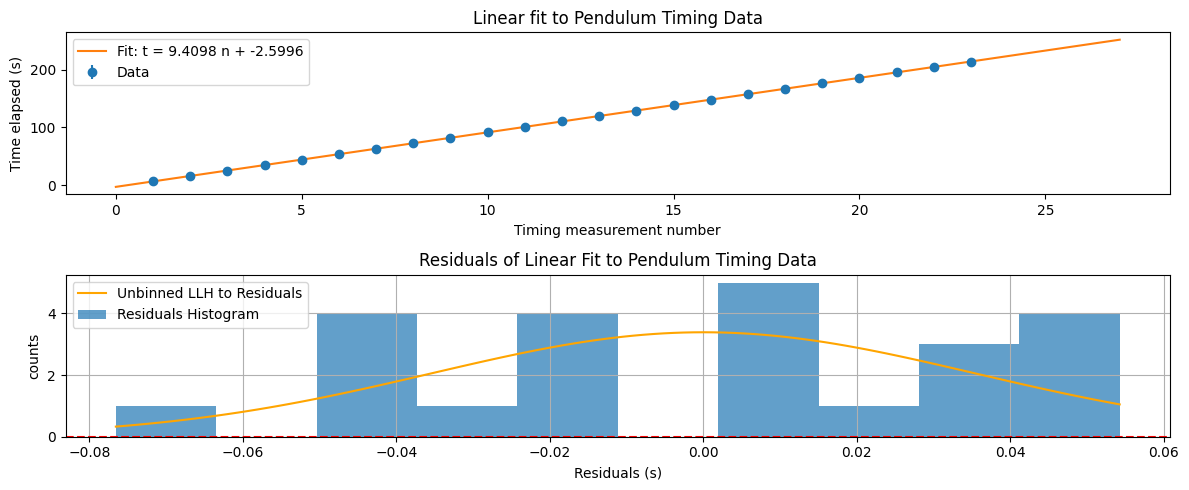

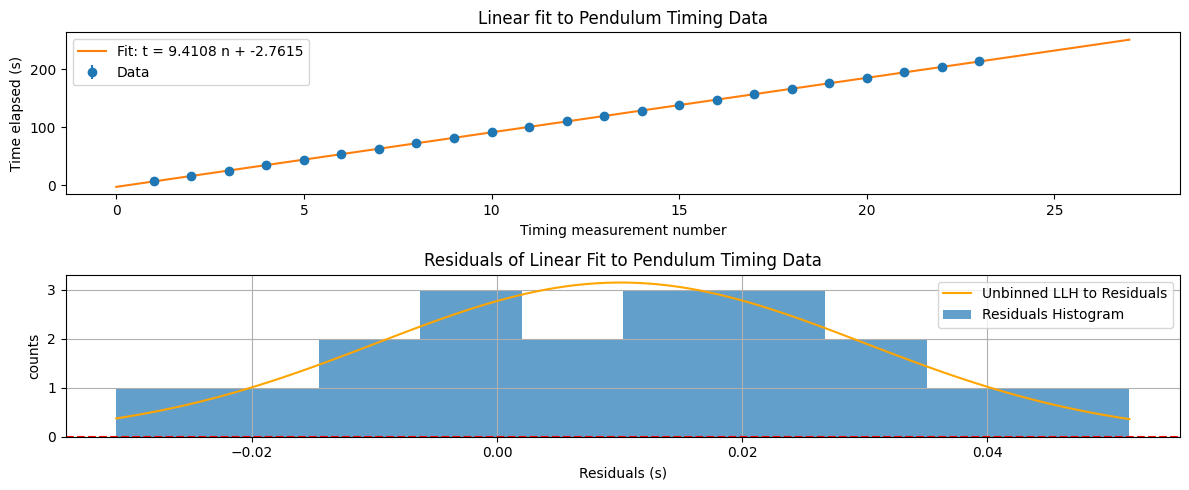

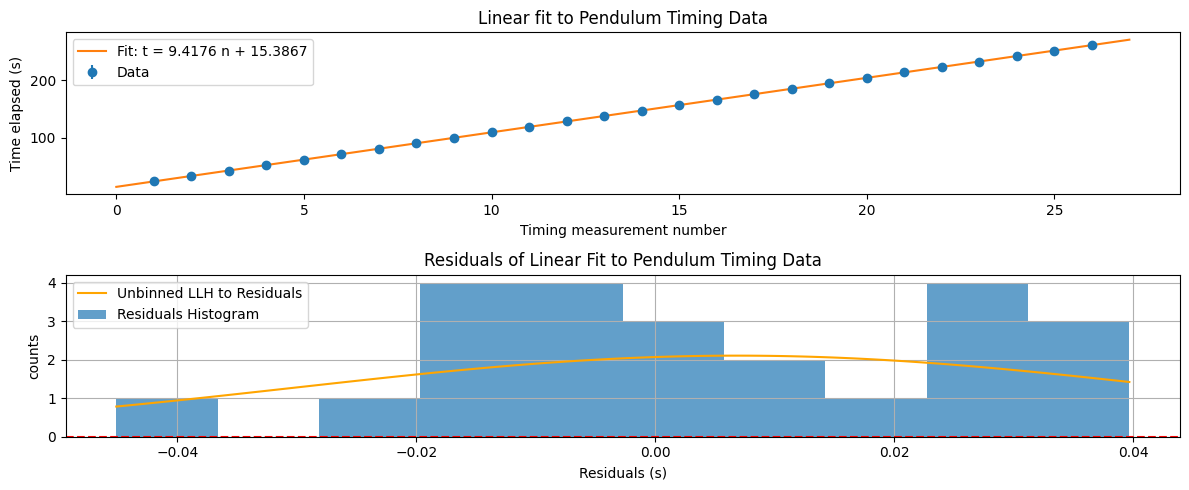

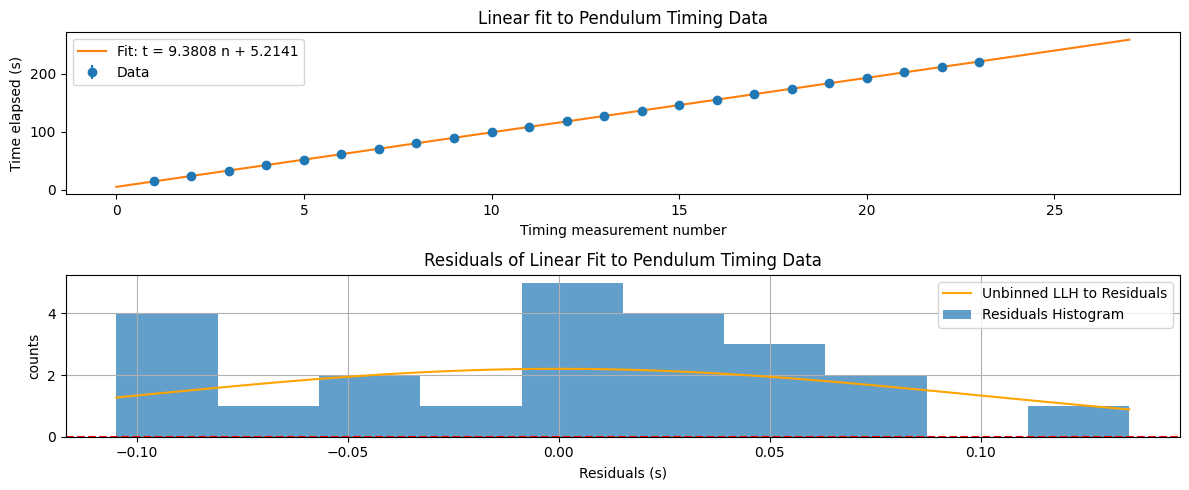

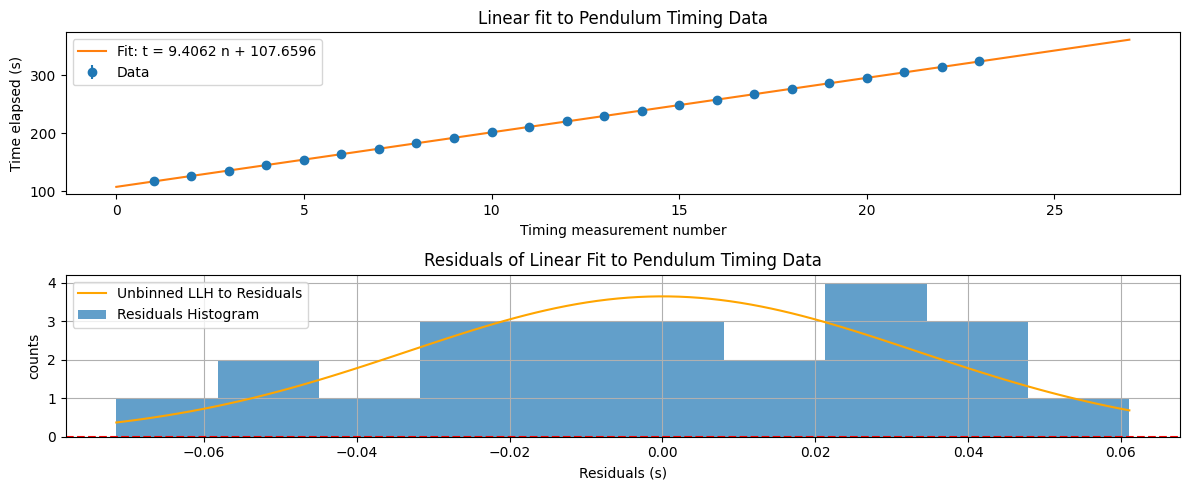

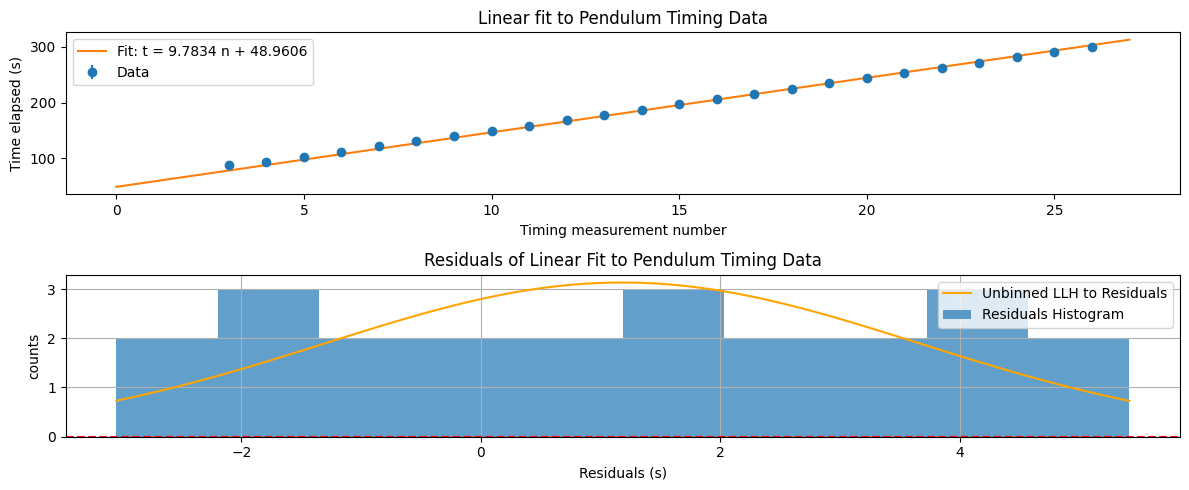

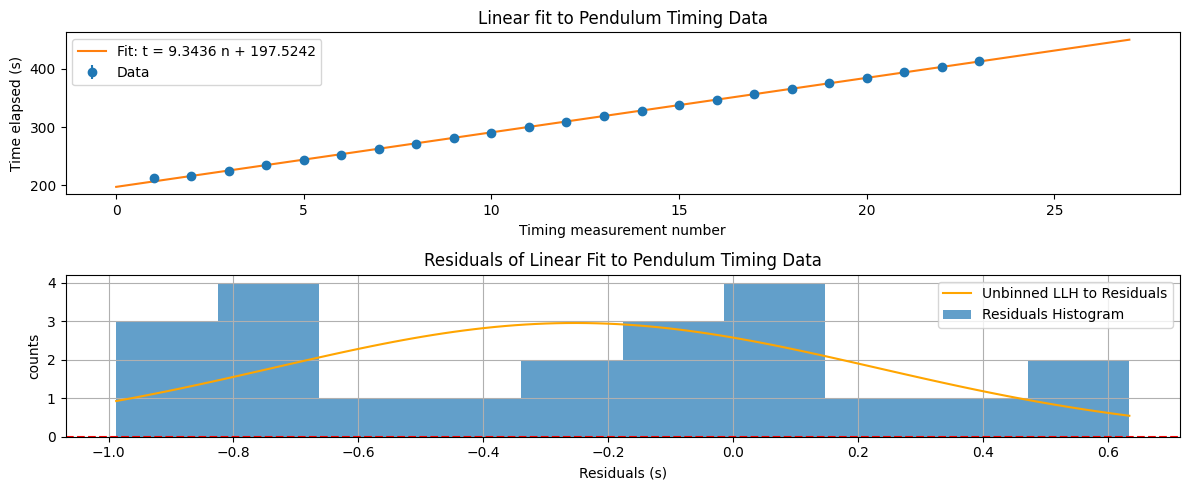

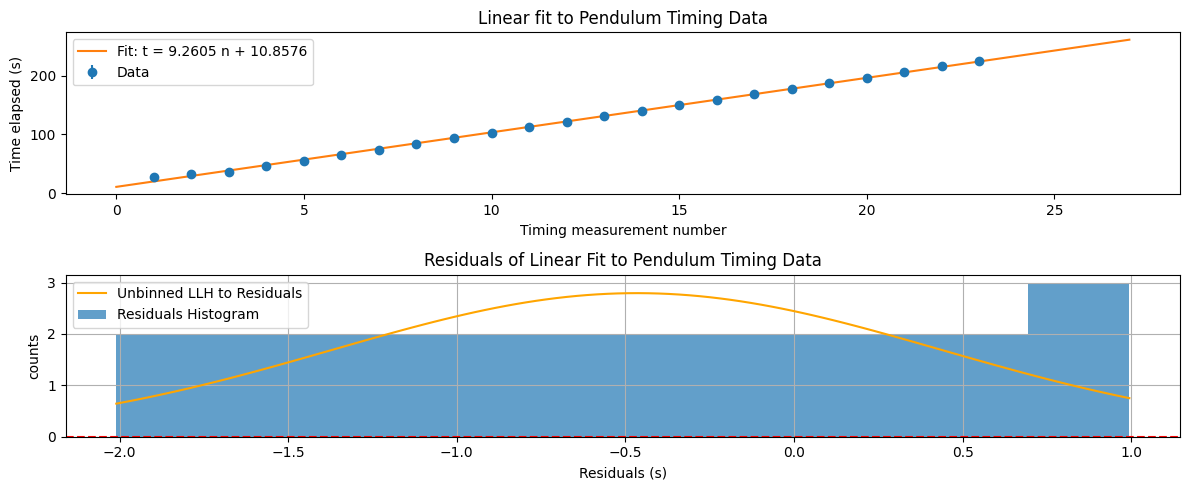

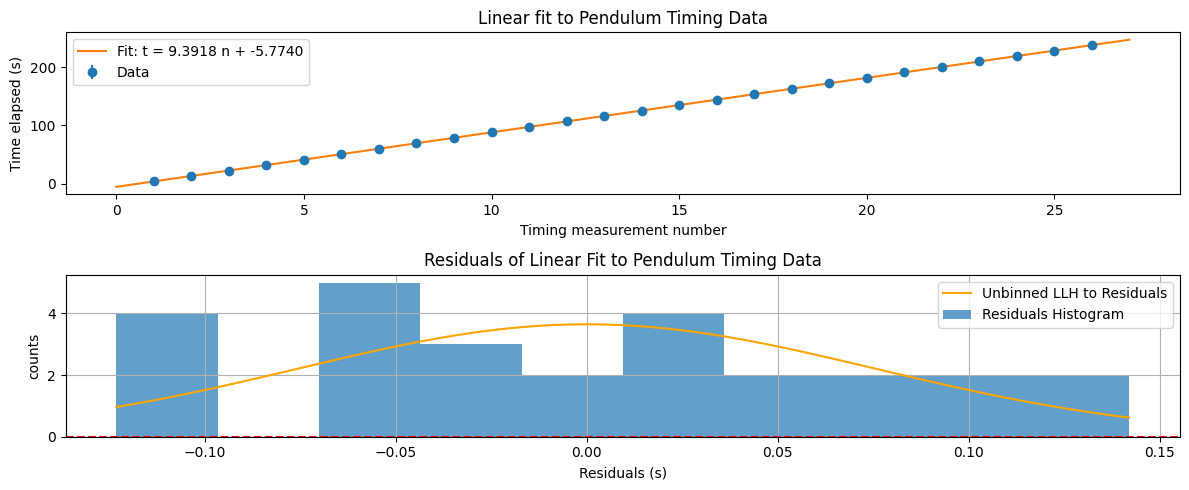

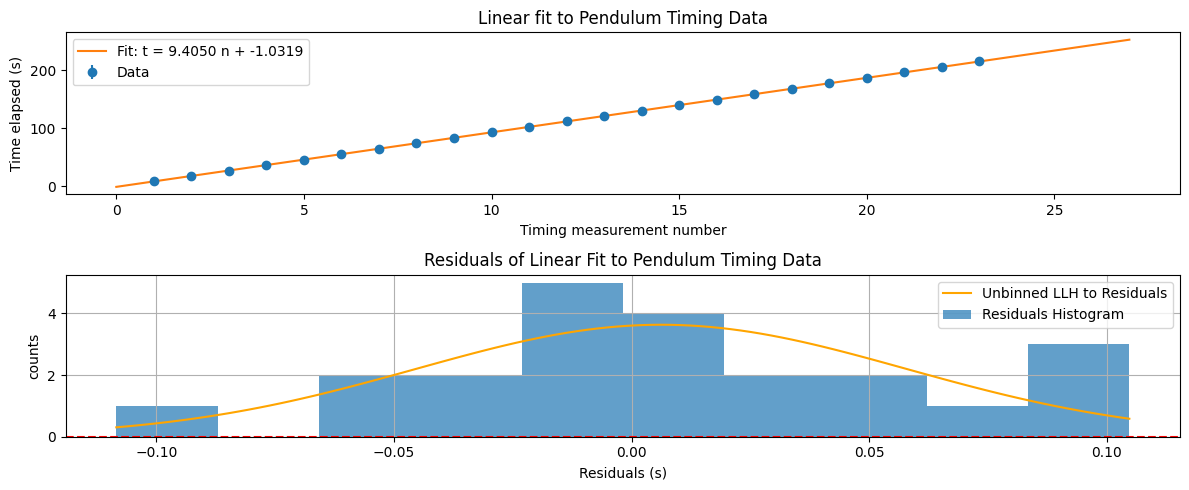

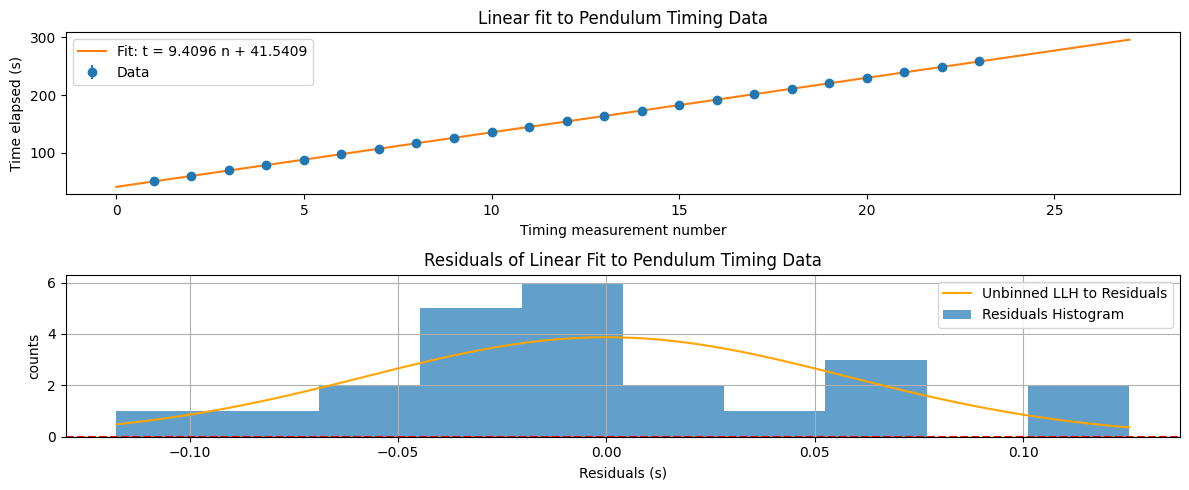

In [8]:
i=0
names = ['Asger 1', 'Asger 2', 'Asger 3',
         'Ask 1', 'Ask 2',
         'Jeppe 1', 'Jeppe 2', 'Jeppe 3',
         'Julie 1', 'Julie 2', 'Julie 3',
         'Sebastian 1', 'Sebastian 2', 'Sebastian 3']
sigmas = []
for dat, params in zip(data_sets, param_list):
    n, t = cut_data(*dat, max_n=23 if i in (3,4,6,7,9,10,12,13) else 26)
    if i==8:
        n,t =n[2:], t[2:]  # Julie 1 has outliers at n=0
    
    a, b = params
    #a_rest, b_rest = params_rest
    fig, axs = plt.subplots(2,1,figsize=(12,5))
    axs[0].errorbar(n, t, yerr=sig_t, fmt='o', label='Data')
    #axs[0].errorbar(n_rest, t_rest, yerr=sig_t, fmt='x', label='Data after break')
    n_fit = np.linspace(0, 27, 100)
    
    t_fit = lin_fit(n_fit, a, b)
    #if len(n_rest)>3:
        #t_fit_rest = lin_fit(n_fit, a_rest, b_rest)
    axs[0].plot(n_fit, t_fit, label='Fit: t = {:.4f} n + {:.4f}'.format(a, b))
    #if len(t_fit_rest) !=0:
        #axs[0].plot(n_fit, t_fit_rest, label='Fit after break: t = {:.4f} n + {:.4f}'.format(a_rest, b_rest))
    axs[0].set_xlabel('Timing measurement number')
    axs[0].set_ylabel('Time elapsed (s)')
    axs[0].set_title('Linear fit to Pendulum Timing Data')
    axs[0].legend()
    # residual plot
    
    residuals = np.array(t - lin_fit(n, a, b))
    # Clean residuals from outliers
    for _ in range(8):  # Repeat cleaning process 8 times
        residuals = clean_data(residuals)
    
  

    ullhfit = cost.UnbinnedNLL(residuals, gauss_pdf)
    
    minuit_ullh = Minuit(ullhfit,  mu=0, sigma=0.1)
    minuit_ullh.migrad()           
    #Nbins= int(np.sqrt(len(n)))
    Nbins=10
    
    counts, edges = np.histogram(residuals, bins=Nbins)
    bin_width = edges[1] - edges[0]
    bin_centers = 0.5 * (edges[1:] + edges[:-1])
    axs[1].bar(bin_centers, counts, width=bin_width, alpha=0.7, label='Residuals Histogram')
    x_plot = np.linspace(min(residuals), max(residuals), 100)
    y_plot =  len(residuals) * bin_width *gauss_pdf(x_plot, minuit_ullh.values['mu'], minuit_ullh.values['sigma'])
    axs[1].plot(x_plot, y_plot, color='orange', label='Unbinned LLH to Residuals')
    #axs[1].bar(edges[:-1], counts, width=bin_width, alpha=0.7, label='Residuals Histogram')
    axs[1].axhline(0, color='red', linestyle='--')
    axs[1].set_xlabel('Residuals (s)')
    axs[1].set_ylabel('counts')
    axs[1].grid()
    #axs[1].set_ylim(-0.01, 0.01)
    #axs[1].set_xlim(0, 23 if (i==3 or i==6) else 26)
    axs[1].set_title('Residuals of Linear Fit to Pendulum Timing Data')
    axs[1].legend()
    plt.tight_layout()
    plt.show()
    sigmas.append(minuit_ullh.values['sigma'])
    i += 1



In [9]:
asger = [param_list[0][0], param_list[1][0], param_list[2][0]]
sigma_asger = [sigmas[0], sigmas[1], sigmas[2]]
w_asger = 1/np.array(sigma_asger)**2
avg_asger = np.sum(w_asger * asger)/np.sum(w_asger)
e_asger= 1/np.sqrt(np.sum(w_asger))

ask = [param_list[3][0], param_list[4][0]]
sigma_ask = [sigmas[3], sigmas[4]]
w_ask = 1/np.array(sigma_ask)**2
avg_ask = np.sum(w_ask * ask)/np.sum(w_ask)
e_ask= 1/np.sqrt(np.sum(w_ask))


jeppe = [param_list[5][0], param_list[6][0], param_list[7][0]]
sigma_jeppe = [sigmas[5], sigmas[6], sigmas[7]]
w_jeppe = 1/np.array(sigma_jeppe)**2
avg_jeppe = np.sum(w_jeppe * jeppe)/np.sum(w_jeppe)
e_jeppe= 1/np.sqrt(np.sum(w_jeppe))

julie = [param_list[8][0], param_list[9][0], param_list[10][0]]
sigma_julie = [sigmas[8], sigmas[9], sigmas[10]]
w_julie = 1/np.array(sigma_julie)**2
avg_julie = np.sum(w_julie * julie)/np.sum(w_julie)
e_julie= 1/np.sqrt(np.sum(w_julie))

sebastian = [param_list[11][0], param_list[12][0], param_list[13][0]]
sigma_sebastian = [sigmas[11], sigmas[12], sigmas[13]]
w_sebastian = 1/np.array(sigma_sebastian)**2
avg_sebastian = np.sum(w_sebastian * sebastian)/np.sum(w_sebastian)
e_sebastian= 1/np.sqrt(np.sum(w_sebastian))

print('Weighted averages of period measurements:\n')
print('Asger: T = {:.2f} s'.format(avg_asger), '+/- {:.2f} s'.format(e_asger))
print('Ask: T = {:.2f} s'.format(avg_ask), '+/- {:.2f} s'.format(e_ask))
print('Jeppe: T = {:.2f} s'.format(avg_jeppe), '+/- {:.2f} s'.format(e_jeppe))
print('Julie: T = {:.1f} s'.format(avg_julie), '+/- {:.1f} s'.format(e_julie))
print('Sebastian: T = {:.2f} s'.format(avg_sebastian), '+/- {:.2f} s'.format(e_sebastian))




    

Weighted averages of period measurements:

Asger: T = 9.41 s +/- 0.03 s
Ask: T = 9.41 s +/- 0.02 s
Jeppe: T = 9.41 s +/- 0.02 s
Julie: T = 9.3 s +/- 0.4 s
Sebastian: T = 9.40 s +/- 0.03 s


In [10]:
mean_periods = np.array([avg_asger, avg_ask, avg_jeppe, avg_julie, avg_sebastian])
errors_periods = np.array([e_asger, e_ask, e_jeppe, e_julie, e_sebastian])
weights = 1/errors_periods**2
global_avg = np.sum(weights * mean_periods)/np.sum(weights)
global_error= 1/np.sqrt(np.sum(weights))

chi2= np.sum( ((mean_periods - global_avg)/errors_periods)**2 )
ndof = len(mean_periods) -1

p_val = 1 - stats.chi2.cdf(chi2, ndof)

print('\nGlobal weighted average of all period measurements:')
print('T = {:.2f} s'.format(global_avg), '+/- {:.2f} s'.format(global_error))
print('Chi2 = {:.2f}, p-value = {:.3f}'.format(chi2, p_val))




Global weighted average of all period measurements:
T = 9.41 s +/- 0.01 s
Chi2 = 0.07, p-value = 0.999


In [14]:
import pandas as pd
df = pd.read_excel('/Users/asgerthormann/Documents/applied_statistics/Project/Pendulum/Pendulum_Group1_data.xlsx')  # reads first sheet




In [24]:
df

,Her er vores data for højden fra 4. sal til gulvet,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jeppe,22175.0,22162.0,22171.0,22161.0,22166.0,22158.0,22159.0,22160.0,22160.0,22161.0
2,Sebastian,22159.0,22160.0,22156.0,22160.0,22162.0,22163.0,22157.0,22157.0,22156.0,22157.0
3,Asger,22280.0,22270.0,22264.0,22267.0,22273.0,NaN,NaN,NaN,NaN,NaN
4,Ask,22265.0,22267.0,22271.0,22275.0,22270.0,NaN,NaN,NaN,NaN,NaN
5,Julie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
h_jeppe = df.iloc[1,:]
h_jeppe = h_jeppe.to_numpy()
h_jeppe = h_jeppe[1:]

h_sebastian = df.iloc[2,:]
h_sebastian = h_sebastian.to_numpy()
h_sebastian = h_sebastian[1:]

h_asger = df.iloc[3,:]
h_asger = h_asger.to_numpy()
h_asger = h_asger[1:]

h_ask = df.iloc[4,:]
h_ask = h_ask.to_numpy()
h_ask = h_ask[1:]

heights = np.zeros((4,len(h_jeppe)))
heights[0,:] = h_jeppe
heights[1,:] = h_sebastian
heights[2,:] = h_asger
heights[3,:] = h_ask

print(heights)

# compute mean and std for each row:
mean_heights = np.nanmean(heights, axis=1)
std_heights = np.nanstd(heights, axis=1, ddof=1)

print('Mean heights (cm):', mean_heights)
print('Standard deviation of heights (cm):', std_heights)

[[22175. 22162. 22171. 22161. 22166. 22158. 22159. 22160. 22160. 22161.]
 [22159. 22160. 22156. 22160. 22162. 22163. 22157. 22157. 22156. 22157.]
 [22280. 22270. 22264. 22267. 22273.    nan    nan    nan    nan    nan]
 [22265. 22267. 22271. 22275. 22270.    nan    nan    nan    nan    nan]]
Mean heights (cm): [22163.3 22158.7 22270.8 22269.6]
Standard deviation of heights (cm): [5.61842208 2.49666444 6.14003257 3.84707681]


In [ ]:

df = pd.read_excel('/Users/asgerthormann/Documents/applied_statistics/Project/Pendulum/Pendulum_Group1_data.xlsx', sheet_name='Gulv til pendul')  # reads first sheet




In [40]:
df


,Her er vores data målt fra gulvet til bunden og toppen af pendulet [cm],Gulv-Bund,Usikkerhed,Gulv-top,Usikkerhed.1
0,Note: det her datasæt er måske lidt cursed. Da...,NaN,NaN,NaN,NaN
1,Sebastian,66.05,0.05,76.10,0.05
2,Jeppe,66.15,0.05,76.15,0.05
3,Julie,10.10,0.05,NaN,NaN
4,NaN,10.10,0.05,NaN,NaN
5,Ask,10.20,0.10,NaN,NaN
6,NaN,10.10,0.10,NaN,NaN
7,Asger,66.05,NaN,76.10,NaN
8,NaN,10.15,NaN,NaN,NaN


In [ ]:
navne = np.array(['Jeppe', 'Sebastian', 'Asger', 'Ask', 'Julie'])
bund = np.array([66.15,66.05, 66.05, 10.20, 10.10])
usik = np.array([0.05,0.05,0.05,0.1,0.05])  # estimated reading uncertainty

lod = 10


